# *Merged Jupyter Notebook*

<hr><font color="green"><h1>from file: (1)5-2 Encodings_Practice</h1></font>

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In this notebook, you'll be working with the Pokأ©mon dataset from the univariate plots lesson.

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: To start, let's look at the relationship between the Pokأ©mon combat statistics of Speed, Defense, and Special-Defense. If a Pokأ©mon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

<h3 style="color:blue">The more the Defense The less the Speed</h3>

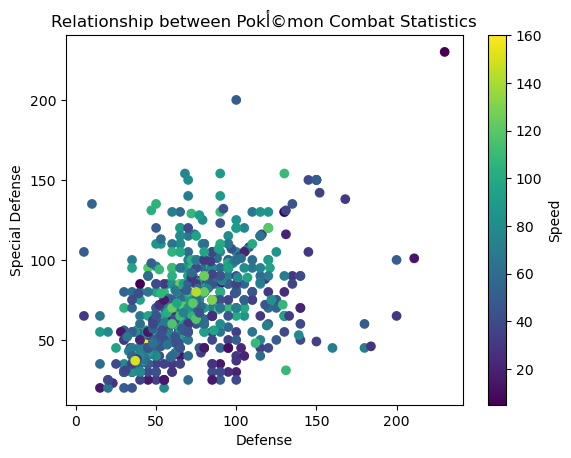

In [3]:
# Extract the required columns from the DataFrame
speed = pokemon['speed']
defense = pokemon['defense']
special_defense = pokemon['special-defense']

# Create the scatter plot
plt.scatter(defense, special_defense, c=speed, cmap='viridis')
plt.colorbar(label='Speed')

# Add labels and title
plt.xlabel('Defense')
plt.ylabel('Special Defense')
plt.title('Relationship between Pokأ©mon Combat Statistics')

# Display the plot
plt.show()

To complete the second task, we need to first reshape the dataset so that all Pokأ©mon types are recorded in a single column. This will add duplicates of Pokأ©mon with two types, which is fine for the task to be performed.

In [4]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()


,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


**Task 2**: How do weights and heights compare between Fairy type Pokأ©mon and Dragon type Pokأ©mon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

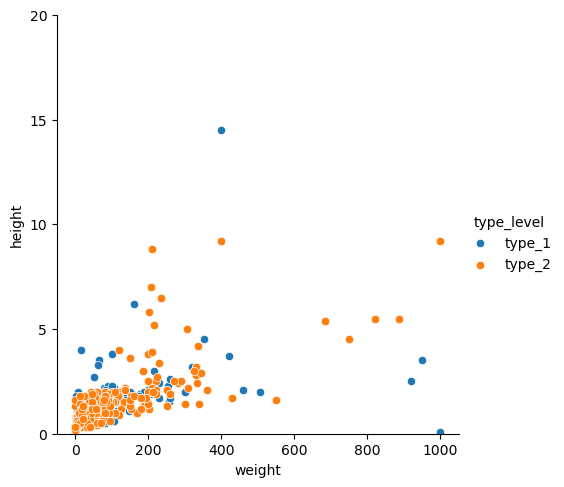

In [5]:
# Subset the DataFrame for Fairy type and Dragon type Pokأ©mon
fairy_pokemon = pkmn_types[(pkmn_types['type_level'] == 'type_1') ]
dragon_pokemon = pkmn_types[(pkmn_types['type_level'] == 'type_2') ]


# Create a FacetGrid object
grid = sb.FacetGrid(data=pkmn_types,
                     hue="type_level",
                     height=5)

# Set the axis scaling and tick marks
grid.set(yscale="log", ylim=(0.1, 1000), yticks=[0.1, 1, 10, 100, 1000])
# Plot the weights
grid.map(sb.scatterplot, "weight","height")



# Set the axis scaling and tick marks for heights
grid.set(yscale="linear", ylim=(0, 20), yticks=[0, 5, 10, 15, 20])
grid.add_legend();


<hr><font color="green"><h1>from file: (2)9-2 Adapted_Plot_Practice</h1></font>

In [6]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In this workspace, you will work with the fuel economy dataset from the previous lesson on bivariate plots.

In [7]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Plot the city ('city') vs. highway ('highway') fuel efficiencies (both in mpg) for each vehicle class ('VClass'). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

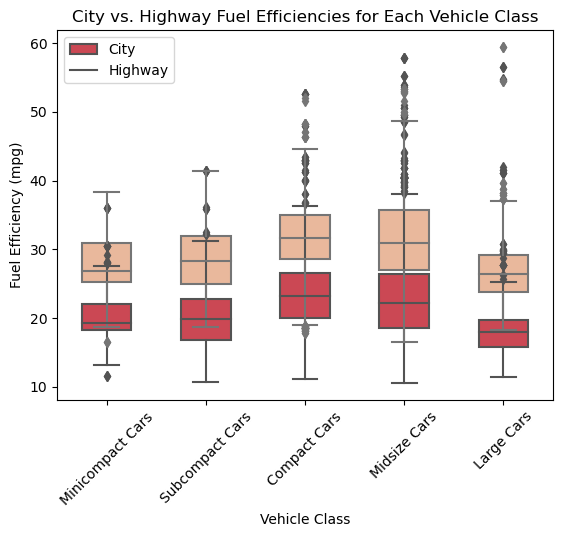

In [8]:
fuel_efficiency_data = fuel_econ[['city', 'highway', 'VClass']]
vehicle_class_order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
sb.boxplot(data=fuel_efficiency_data, x='VClass', y='city', order=vehicle_class_order, color=sb.color_palette("rocket")[3], width=0.5)
sb.boxplot(data=fuel_efficiency_data, x='VClass', y='highway', order=vehicle_class_order, color=sb.color_palette("rocket")[5], width=0.5)

plt.xlabel('Vehicle Class')
plt.ylabel('Fuel Efficiency (mpg)')
plt.title('City vs. Highway Fuel Efficiencies for Each Vehicle Class')
plt.legend(labels=['City', 'Highway'])
plt.xticks(rotation=45)

plt.show()

**Task 2**: Plot the relationship between engine size ('displ', in liters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

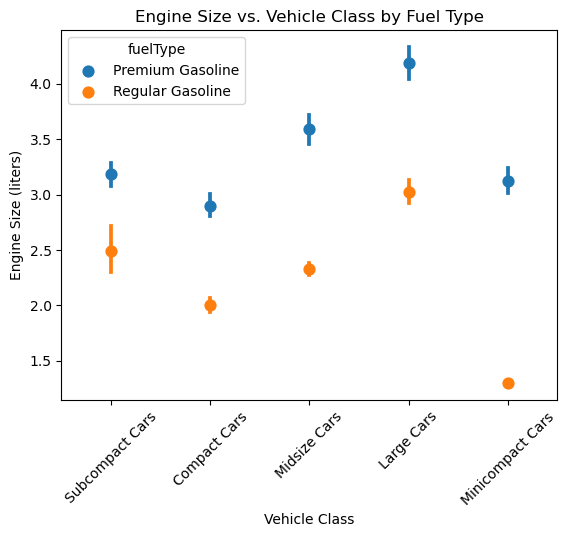

In [9]:
fuel_type_filtered_data = fuel_econ[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
sb.pointplot(data=fuel_type_filtered_data, x='VClass', y='displ', hue='fuelType',linestyles="" )

plt.xlabel('Vehicle Class')
plt.ylabel('Engine Size (liters)')
plt.title('Engine Size vs. Vehicle Class by Fuel Type')
plt.xticks(rotation=45)

plt.show();

<hr><font color="green"><h1>from file: (3)13-2 Additional_Plot_Practice</h1></font>

In [10]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

We will continue to work with the fuel economy dataset in this workspace.

In [11]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Practice creating a plot matrix, by depicting the relationship between five numeric variables in the fuel efficiency dataset: 'displ', 'co2', 'city', 'highway', and 'comb'. Do you see any interesting relationships that weren't highlighted previously?

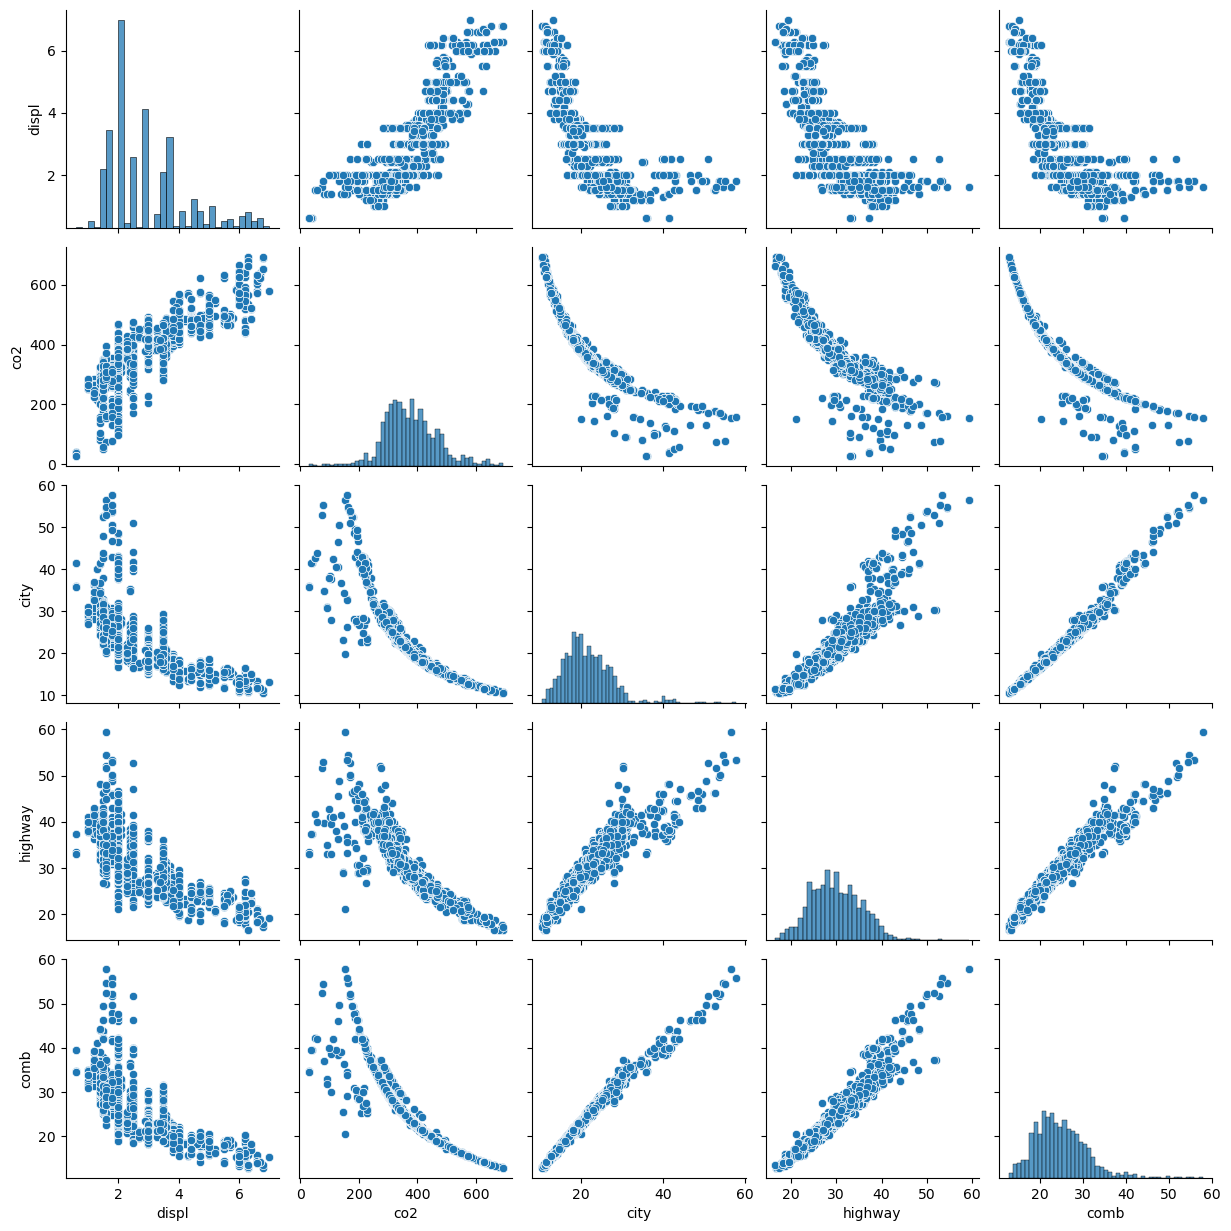

In [12]:
columns_of_interest = ['displ', 'co2', 'city', 'highway', 'comb']
selected_data = fuel_econ[columns_of_interest]
sb.pairplot(selected_data)
plt.show()

**Task 2**: The output of the preceding task pointed out a potentially interesting relationship between co2 emissions and overall fuel efficiency. Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The 'co2' variable is in units of g / mi, and the 'comb' variable is in units of mi / gal.) Then, plot this new emissions variable against engine size ('displ') and fuel type ('fuelType'). For this task, compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.

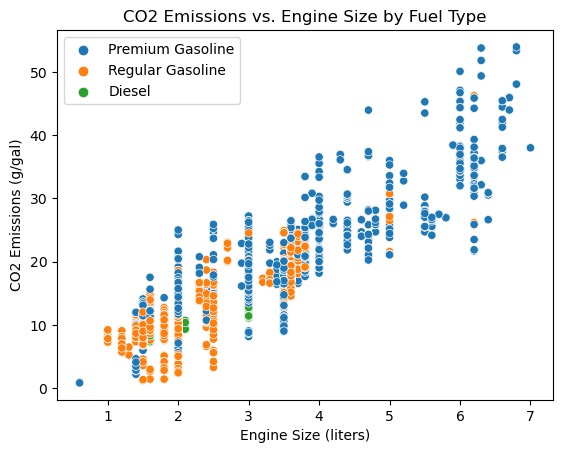

In [13]:
fuel_econ['CO2_emissions_gal'] = fuel_econ['co2'] / fuel_econ['comb']

fuel_type_filtered_data = fuel_econ[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline', 'Diesel'])]

sb.scatterplot(data=fuel_type_filtered_data, x='displ', y='CO2_emissions_gal', hue='fuelType')

plt.xlabel('Engine Size (liters)')
plt.ylabel('CO2 Emissions (g/gal)')
plt.title('CO2 Emissions vs. Engine Size by Fuel Type')
plt.legend()

plt.show()

<hr><font color="green"><h1>from file: (4)5 -2 Polishing_Plots_Practice</h1></font>

In [14]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In this workspace, you'll perform some polishing and cleanup of a plot created using the Pokأ©mon creature dataset.

In [15]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task**: Perform polishing and cleaning steps for the following multivariate plot, where the relationship between height and weight are depicted for the Fairy and Dragon Pokأ©mon types. You'll need to do more than just add meaningful labels and titles to the plot. Pay attention to the interpretability of tick marks and the ability to associate each point to a type of Pokemon.

For reference, height is in terms of meters and weight is in terms of kilograms. One other thing you might try is to change the colors mapped to each type to match those given by the game series. Fairy is depicted with a light pink (hex code #ee99ac) while Dragon is associated with a medium purple (hex code #7038f8). (Type colors taken from [Pokأ©mon Wiki Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates).)

In [16]:
# data processing: isolate only fairy and dragon type Pokemon
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()

pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

C:\Users\Rami\anaconda3\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


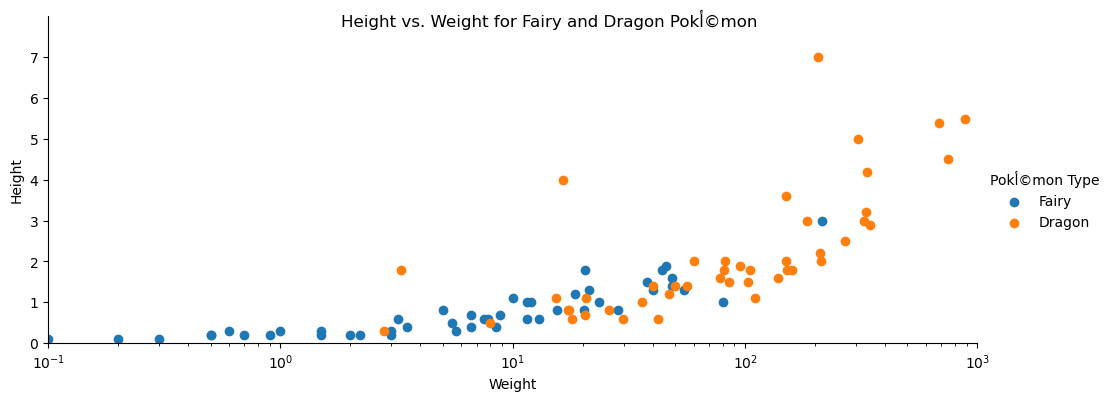

In [19]:
# Modify the code

g = sb.FacetGrid(data=pokemon_sub, hue='type',  height=4, aspect=2.5)
g.map(plt.scatter, 'weight', 'height')
g.set(xscale='log')

# Set axis labels and title
g.set_axis_labels('Weight', 'Height')
g.fig.suptitle('Height vs. Weight for Fairy and Dragon Pokأ©mon')


# Add legend
g.add_legend(title='Pokأ©mon Type', labels=['Fairy', 'Dragon'])

# Set tick labels and limits
g.set(xticks=[0.1, 1, 10, 100, 1000], yticks=[0, 1, 2, 3, 4, 5 ,6 ,7])
g.set(xlim=(0.1, 1000), ylim=(0, 8))

# Show the plot

plt.show();